## Twitter and YouTube Sentiment Analysis on Foldable Smartphones
### Group 21: Max van der Burg, Merve Sari, Patrick Prins, Dominique van Schagen, Kick Timmer


### Install all involved Python modules


In [1]:
!pip install os
!pip install csv
!pip install pandas
!pip install matplotlib
!pip install twitter
!pip install tweepy
!pip install nltk
!pip install textblob
!pip install wordcloud
!pip install re

  ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
  ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv
  ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


### Import all involved modules

In [2]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import tweepy as tw
from textblob import TextBlob
from os import path
from wordcloud import WordCloud
import re
import nltk

### Define Twitter API keys

In [3]:
consumer_key = '1pX1ZFxLjOE7OHquQ0cpRAMXL'
consumer_secret = '0fvFin0zkwlmNZpz3gKUYx93gGBfMSImSXBkM3B5ueBrmFeLf5'
access_token = '422798841-Z2Z8K7RrmxcSNGOIYMD4ACmUKAmQx8w1fIeNHF6u' 
access_token_secret = 'VrZZP2x35TnkaM74iA5YdE9763Xkcr7pMKNA4oiv278Tw'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Import all used data

In [4]:
week1 = list(open(("week1_tweets.csv"),'r'))
week2 = list(open(("week2_tweets.csv"),'r'))
youtube_csv1 = pd.read_csv("Galaxy Z Flip_ Official Introduction.csv")
youtube_csv2 = pd.read_csv("Galaxy Fold_ Official Introduction.csv")

#Create two empty lists containing all tweets
tweets_week1 = [] 
tweets_week2 = []


### Remove URLs
Lets start by removing all the URL's that are found in the tweets. 

In [5]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


### Remove all `\n` elements from list
All records in the dataset `week1` and `week2` contain newline elements. Those are indicated by `\n` and the following function will remove those elements.

In [6]:
def make_list(listname, data):
    for element in data:
        if element not in listname:
            listname.append(element.strip())


In [7]:
make_list(tweets_week1, week1)
make_list(tweets_week2, week2)

### Create sentiment values and plot a histogram
The following two functions will automatically create the sentiment values for each dataset and it's corresponding histogram. 

#### Create a textblob object for every tweet
For every parsed tweet, a textblob element will be created. 
This allows us to process the textual data from the tweet.
The following processing is automatically done by TextBlob:
- Tokenize the tweet.
- Remove stopwords like I, am, you, are, etc. from the tokens.
- Select only significant features/tokens like adjectives, adverbs, etc.

#### Create sentiment values for every tweet
Every parsed tweet will be analyzed and a list will be created containing all the polarity values and text for each tweet. 

#### Plot Sentiment Analysis 
A histogram will be created, which can  highlight the overall sentiment of a dataset. 

In [8]:
def sentiment(data, title):
    sentiment_objects = [TextBlob(tweet) for tweet in data]
    sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
    sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
    make_plot(sentiment_df, title)
    

def make_plot(data,title):
    fig, ax = plt.subplots(figsize=(8, 6))
    data.hist(
             bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")
    plt.title("Sentiments from "+title)
    plt.show()
    

### Create a wordcloud
The following function is able to create a wordcloud out of a given dataset. 

In [9]:
def make_wordcloud(data, title):
    wordcloud = WordCloud().generate(str(data))
    wordcloud = WordCloud(max_font_size=40).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Wordcloud from "+title)
    plt.show()


### Plot Sentiment Analysis of Twitter Data
A histogram will be created, which can help to highlight in the overall sentiment towards the given search query. 

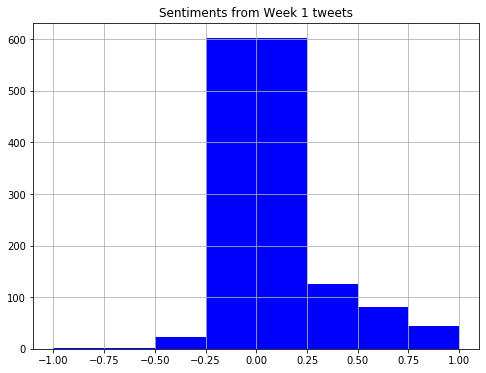

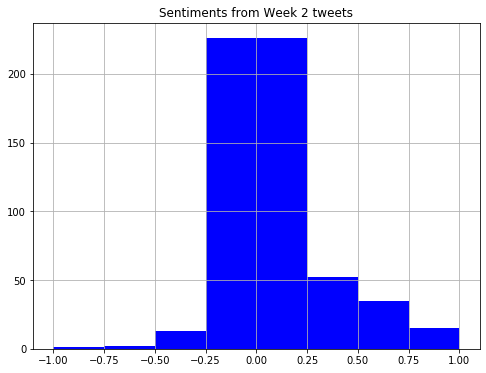

In [10]:
sentiment(tweets_week1, 'Week 1 tweets')
sentiment(tweets_week2, 'Week 2 tweets')


### Create a WordCloud
Using all the data from the tweets in the CSV file.

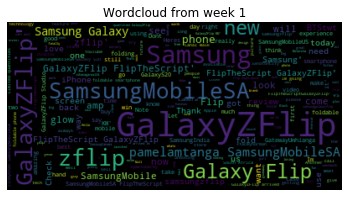

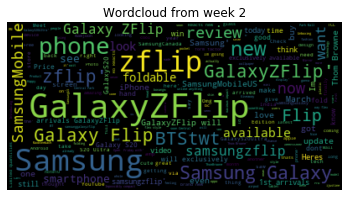

In [11]:
make_wordcloud(tweets_week1, 'week 1')
make_wordcloud(tweets_week2, 'week 2')


### Youtube Comments Sentiment Analysis

Import the natural language toolkit and create a set of words that can be used to filter out all non-English words.

In [12]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/maxvanderburg/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Import the YouTube comments
Comments from two most-viewed videos are stored in two separate CSV files.

Both CSV files are stored in two separte variables and comments in the files are converted to a list-element. `comments_total` is now a variable containing comments from both videos.

In [13]:
comments_total = list(youtube_csv1.Comment) + list(youtube_csv2.Comment)

To see and check whether `comments_total` contains any data, we print the last element from the list. 

In [14]:
comments_total[-1]

"me that's cool *my wallet* don,t even think about it *me buys it* my wallet so you choose death"

### Filter non-English words
The following code will automatically remove all the non-English instances, using the NLTK module.

In [15]:
for comment in comments_total:
    "".join(w for w in nltk.wordpunct_tokenize(comment) if w.lower() in words or not w.isalpha())

### Create a sentiment histogram 

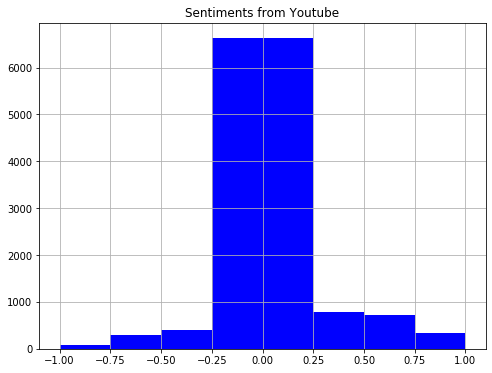

In [16]:
sentiment(comments_total, 'Youtube')

## How we have collected the tweets

### Define search query
We have started by defining a search query. In the variable `search_term` we can define the specific hashtag that we want to further analyze. Since we use the "-filter"-part, retweets will be removed from the results.
After retrieving all the tweets containing the given search term, the URLs will be automatically removed.

In [17]:
search_term = ["ZFlip -filter:retweets", "GalaxyZFlip -filter:retweets", "SamsungZFlip -filter:retweets"]

### Preprocessed data
The following code will retrieve all the tweets without filtering on a specific aspect. 

In [18]:
raw_tweets = []
for x in search_term:
    tweets_raw = tw.Cursor(api.search,
                       q=x,
                       count=100).items(100000)
    raw_tweets_no_urls = [remove_url(tweet.text) for tweet in tweets_raw]
    raw_tweets += raw_tweets_no_urls
print (("The number of unique tweets without filtering on the Twitter API is:"),len(raw_tweets))

The number of unique tweets without filtering on the Twitter API is: 946


### Filter tweets on the Twitter API
The following code will filter the tweets based on language. We are only interested in English tweets since TextBlob can only handle English tweets. Therefore, we use the language filter. 

In [19]:
filtered_tweets = []
for x in search_term:
    tweets = tw.Cursor(api.search,
                       q=x,
                       lang='en',
                       count=100).items(100000)
    tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]
    filtered_tweets += tweets_no_urls
print (("The number of unique tweets after filtering on the Twitter API is:"),len(filtered_tweets))

The number of unique tweets after filtering on the Twitter API is: 437


### Create a CSV File containing all the tweets
The code below automatically downloads all the recent tweets and appends those tweets to the `tweets.csv` file. 

In [20]:
with open('duplicate_tweets.csv', 'w') as result:
    writer = csv.writer(result, delimiter=",")
    for tweet in filtered_tweets:
        columns = [c.strip() for c in tweet.strip(', ').split(',')]
        writer.writerow(columns)

### Remove all the duplicates from the tweets 
A new CSV file will be made containing all the unique tweets and duplicate tweets will be removed

In [21]:
mylist = list(dict.fromkeys(filtered_tweets))
with open('tweets.csv', 'w') as result:
    writer = csv.writer(result)
    for tweet in mylist:
        columns = [c.strip() for c in tweet.strip(', ').split(',')]
        writer.writerow(columns)


### Check whether the CSV file contains any data

In [22]:
file = open('tweets.csv', 'r')
for record in file:
    print (record)
    break

Liked on YouTube Which to buy Samsung Galaxy S20 S20 plus S20 ultra or Galaxy Z Flip



Used codes came from: 
- https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
- https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/analyze-tweet-sentiments-in-python/
- https://gist.github.com/vickyqian/f70e9ab3910c7c290d9d715491cde44c 